# MA934 - class 1

You should make at least one commit to your repository per computational task below - usually more.


## Task 1

Make sure that you can run the sample code in main.jl

Add a new function to the module Starter.jl that reads in parameters $\alpha$ and $n$ and produces a log plot of some samples of the function $$f(x) = x^\alpha \, \log(x)$$
at values of $x$ that increase in powers of 2 from 1 to $2^n$. This should only involve minor modifications of the existing code.

## Task 2

Write a new module containing functions that compute the $n^{th}$ term, $a_n$, in the Fibonacci sequence:
 * Iteratively
 * Recursively
 * Using memoization (hint: use Julia's Dict type for the lookup table)
 
The functions should work starting from any given values of $a_1$ and $a_2$.

Use the BenchmarkTools.jl package to measure the run-time of each of these functions over a range of values of $n$ and produce a plot to illustrate your results.

The recursive function implementation gets slow very quickly - I could only do up to $n=48$ on my laptop. Write a recursion relation for the computational complexity of the recursive version of the task. Solve it to prove that the computational complexity grows exponentially with $n$.

## Task 3

The computational complexity of the naive divide-and-conquer algorithm for matrix multiplication satisfies the functional equation $$F(n) = 8 F(n/2) + 4 (n/2)^2$$ with $F(1)=1$.

The corresponding equation for Strassen multiplication is $$F(n) = 7 F(n/2) + 18 (n/2)^2$$ with $F(1)=1$.

Solve these recurrence relations explicitly to prove that the computational complexity of the two algorithms are $O(n^3)$ and $O(n^{\log_2(7)})$ respectively. 

It is helpful to adopt the change of variables $n=2^p$ with $a_p = F(2^p)$ to obtain linear (albeit inhomogeneous) recursion relations. 

Some helpful online notes about solving recursion relations can be found at:

https://www.tutorialspoint.com/discrete_mathematics/discrete_mathematics_recurrence_relation.htm

In [7]:
using Revise
using Starter
using Pkg

In [3]:
push!(LOAD_PATH, pwd())

4-element Array{String,1}:
 "@"
 "@v#.#"
 "@stdlib"
 "/home/u1997128/Documents/MA934/ma934-worksheet-1-andrewanguswarwick"

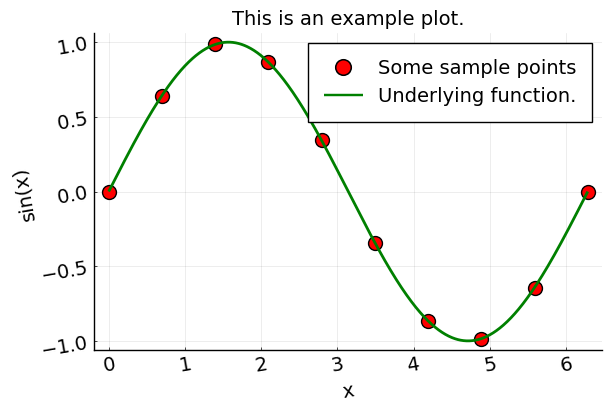

args[group2][parameter3] = 10.0  Type = Float64
args[group2][parameter4] = test.csv  Type = String
args[group1][parameter1] = 10  Type = Int64
args[group1][parameter2] = This is some text  Type = String


In [10]:
include("main.jl")

# Task 1 Answer

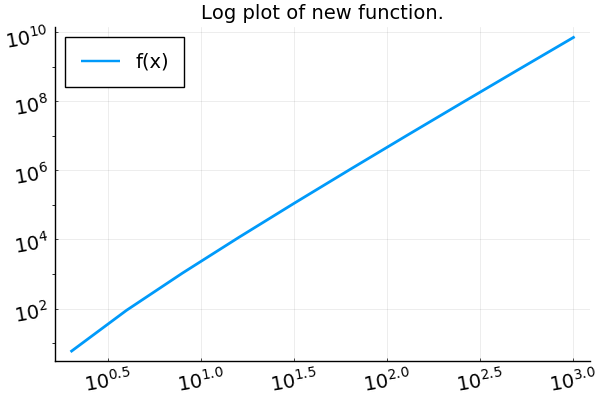

In [9]:
# Task 1
alpha = 3; n = 10
g = new_plot(alpha,n)

# Task 2 Answer

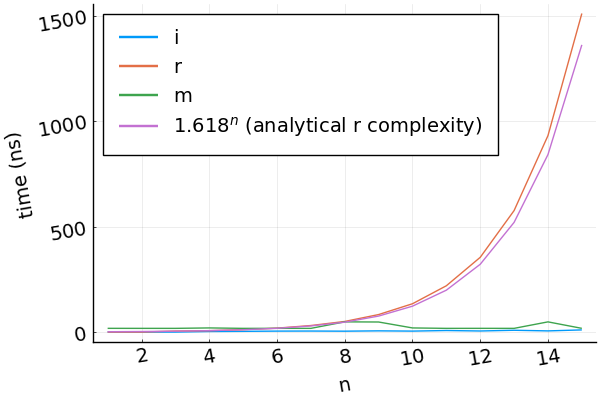

In [48]:
using Fibonacci
using BenchmarkTools
using Plots; pyplot()
using LaTeXStrings

# Initialise dictionaries
times = Dict()
bm = Dict()
for i in ["i","r","m"]
    times[i] = Float64[]
end
memo = Dict()
memo[1] = 0; memo[2] = 1

# Benchmark functions for n = 1:maxn
maxn = 15
nrange = 1:maxn
for n in nrange
    bm["i"] = @benchmark fib_i($n)
    bm["r"] = @benchmark fib_r($n)
    bm["m"] = @benchmark fib_m($n,$memo)
    for i in ["i","r","m"]
        push!(times[i], median(bm[i].times))
    end
end

# Plot times as function of n
p = plot(xlabel="n",ylabel="time (ns)")
for i in ["i","r","m"]
    plot!(nrange,times[i],label=i)
end
plot!(nrange,1.618 .^nrange,label=L"1.618^n" *" (analytical r complexity)")

Recursion relation for Fibonacci recursive complexity: $$F(n) = F(n-1) + F(n-2) + 1; F(1) = 1 \text{, } F(2) = 1$$

$$\text{Take homogeneous eq. and let }F(n) = x^n$$
$$\rightarrow x^n - x^{n-1} - x^{n-2} = 0$$
$$\rightarrow x^2 - x - 1 = 0$$
$$\rightarrow x_{1,2} = \frac{1\pm\sqrt{5}}{2}$$
$$F_h = Ax_1^n + Bx_2^n$$

$$\text{Take inhomogeneous eq. and try }F(n) = C$$
$$\rightarrow C = C + C + 1 $$
$$\rightarrow C = -1$$
$$\rightarrow F_t = -1$$

$$F(n) = F_h + F_t$$
$$\rightarrow F(n) = Ax_1^n + Bx_2^n - 1$$
$$F(1) = 1 = Ax_1^1 + Bx_2^1 - 1$$
$$\rightarrow A = \frac{2-Bx_2}{x_1}$$
$$F(2) = 1 = Ax_1^2 + Bx_2^2 - 1$$
$$\rightarrow 2 = \frac{2-Bx_2}{x_1}x_1^2 + Bx_2^2$$
$$\rightarrow 2 = 2x_1 - Bx_2x_1 + Bx_2^2$$
$$\rightarrow B = \frac{2-2x_1}{x_2^2-x_2x_1}$$
$$\rightarrow A = -B = 0.894$$

$$F(n) = 0.894x_1^n - 0.894x_2^n - 1$$
$$\text{Since }|x_1|>|x_2| \rightarrow F(n) = O(x_1^n)$$
$$\text{and since }x_1 > 0 \text{ complexity increases exponentially with n}$$

# Task 3 Answer